# Importy

In [1]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import shutil
import scipy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

# Eksploracja

In [2]:
photos_path = 'C:\\Users\\adamd\\Data Science\\Projekt 2\\Model\\Data\\img_align_celeba\\img_align_celeba'
atrr_path = 'C:\\Users\\adamd\\Data Science\\Projekt 2\\Model'

In [3]:
os.chdir(atrr_path)
atrybuty = pd.read_csv('Data/list_attr_celeba.csv')
atrybuty

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
202595,202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
202596,202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
202597,202598.jpg,-1,1,1,-1,-1,-1,1,-1,1,...,-1,1,-1,1,1,-1,1,-1,-1,1


In [4]:
bbox = pd.read_csv('Data/list_bbox_celeba.csv')
bbox

,image_id,x_1,y_1,width,height
0,000001.jpg,95,71,226,313
1,000002.jpg,72,94,221,306
2,000003.jpg,216,59,91,126
3,000004.jpg,622,257,564,781
4,000005.jpg,236,109,120,166
...,...,...,...,...,...
202594,202595.jpg,1381,91,221,306
202595,202596.jpg,137,129,114,158
202596,202597.jpg,53,76,91,126
202597,202598.jpg,195,28,91,126


In [5]:
eval_partition = pd.read_csv('Data/list_eval_partition.csv')
eval_partition

,image_id,partition
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0
...,...,...
202594,202595.jpg,2
202595,202596.jpg,2
202596,202597.jpg,2
202597,202598.jpg,2


In [6]:
landmarks = pd.read_csv('Data/list_landmarks_align_celeba.csv')
landmarks

,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,000001.jpg,69,109,106,113,77,142,73,152,108,154
1,000002.jpg,69,110,107,112,81,135,70,151,108,153
2,000003.jpg,76,112,104,106,108,128,74,156,98,158
3,000004.jpg,72,113,108,108,101,138,71,155,101,151
4,000005.jpg,66,114,112,112,86,119,71,147,104,150
...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,69,111,108,111,89,140,73,151,104,153
202595,202596.jpg,67,112,110,112,85,141,66,150,110,150
202596,202597.jpg,69,111,107,111,92,137,68,151,109,153
202597,202598.jpg,69,111,108,111,90,137,71,153,106,151


In [7]:
os.getcwd()

'C:\\Users\\adamd\\Data Science\\Projekt 2\\Model'

In [8]:
os.chdir(photos_path)

In [9]:
os.getcwd()

'C:\\Users\\adamd\\Data Science\\Projekt 2\\Model\\Data\\img_align_celeba\\img_align_celeba'

In [10]:
os.listdir()

['000001.jpg',
 '000002.jpg',
 '000003.jpg',
 '000004.jpg',
 '000005.jpg',
 '000006.jpg',
 '000007.jpg',
 '000008.jpg',
 '000009.jpg',
 '000010.jpg',
 '000011.jpg',
 '000012.jpg',
 '000013.jpg',
 '000014.jpg',
 '000015.jpg',
 '000016.jpg',
 '000017.jpg',
 '000018.jpg',
 '000019.jpg',
 '000020.jpg',
 '000021.jpg',
 '000022.jpg',
 '000023.jpg',
 '000024.jpg',
 '000025.jpg',
 '000026.jpg',
 '000027.jpg',
 '000028.jpg',
 '000029.jpg',
 '000030.jpg',
 '000031.jpg',
 '000032.jpg',
 '000033.jpg',
 '000034.jpg',
 '000035.jpg',
 '000036.jpg',
 '000037.jpg',
 '000038.jpg',
 '000039.jpg',
 '000040.jpg',
 '000041.jpg',
 '000042.jpg',
 '000043.jpg',
 '000044.jpg',
 '000045.jpg',
 '000046.jpg',
 '000047.jpg',
 '000048.jpg',
 '000049.jpg',
 '000050.jpg',
 '000051.jpg',
 '000052.jpg',
 '000053.jpg',
 '000054.jpg',
 '000055.jpg',
 '000056.jpg',
 '000057.jpg',
 '000058.jpg',
 '000059.jpg',
 '000060.jpg',
 '000061.jpg',
 '000062.jpg',
 '000063.jpg',
 '000064.jpg',
 '000065.jpg',
 '000066.jpg',
 '000067.j

In [11]:
atrybuty['image_id'].shape[0]

202599

In [12]:
atrybuty['image_id'][1]

'000002.jpg'

In [13]:
img_list = []
for i in range(0,atrybuty['image_id'].shape[0]):
    path = f"{photos_path}\\{atrybuty['image_id'][i]}"
    img_list.append(path)

img_list

['C:\\Users\\adamd\\Data Science\\Projekt 2\\Model\\Data\\img_align_celeba\\img_align_celeba\\000001.jpg',
 'C:\\Users\\adamd\\Data Science\\Projekt 2\\Model\\Data\\img_align_celeba\\img_align_celeba\\000002.jpg',
 'C:\\Users\\adamd\\Data Science\\Projekt 2\\Model\\Data\\img_align_celeba\\img_align_celeba\\000003.jpg',
 'C:\\Users\\adamd\\Data Science\\Projekt 2\\Model\\Data\\img_align_celeba\\img_align_celeba\\000004.jpg',
 'C:\\Users\\adamd\\Data Science\\Projekt 2\\Model\\Data\\img_align_celeba\\img_align_celeba\\000005.jpg',
 'C:\\Users\\adamd\\Data Science\\Projekt 2\\Model\\Data\\img_align_celeba\\img_align_celeba\\000006.jpg',
 'C:\\Users\\adamd\\Data Science\\Projekt 2\\Model\\Data\\img_align_celeba\\img_align_celeba\\000007.jpg',
 'C:\\Users\\adamd\\Data Science\\Projekt 2\\Model\\Data\\img_align_celeba\\img_align_celeba\\000008.jpg',
 'C:\\Users\\adamd\\Data Science\\Projekt 2\\Model\\Data\\img_align_celeba\\img_align_celeba\\000009.jpg',
 'C:\\Users\\adamd\\Data Science\\Pro

Wyświetlenie pierwszego zdjęcia

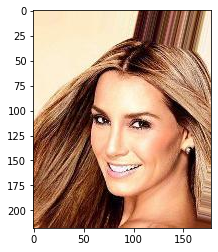

In [14]:
img = cv2.imread(img_list[0])
new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(new_img)

In [15]:
new_img.shape

(218, 178, 3)

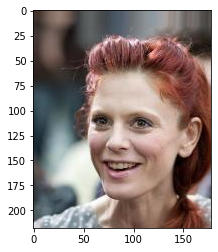

In [16]:
img = cv2.imread(img_list[1])
new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(new_img)

In [17]:
new_img.shape

(218, 178, 3)

# Cz.1 - Rozpoznawanie płci

In [18]:
gender = atrybuty['Male']
gender

0        -1
1        -1
2         1
3        -1
4        -1
         ..
202594   -1
202595    1
202596    1
202597   -1
202598   -1
Name: Male, Length: 202599, dtype: int64

1 - mężczyzna
0 - kobieta

In [19]:
gender.replace(-1,0,inplace=True)
gender

0         0
1         0
2         1
3         0
4         0
         ..
202594    0
202595    1
202596    1
202597    0
202598    0
Name: Male, Length: 202599, dtype: int64

In [20]:
gender.value_counts()

0    118165
1     84434
Name: Male, dtype: int64

In [21]:
y_train = gender[:182638]
# y_train
y_test = gender[182638:]
# y_test

In [22]:
y_train.value_counts()

0    105919
1     76719
Name: Male, dtype: int64

In [23]:
img_list

['C:\\Users\\adamd\\Data Science\\Projekt 2\\Model\\Data\\img_align_celeba\\img_align_celeba\\000001.jpg',
 'C:\\Users\\adamd\\Data Science\\Projekt 2\\Model\\Data\\img_align_celeba\\img_align_celeba\\000002.jpg',
 'C:\\Users\\adamd\\Data Science\\Projekt 2\\Model\\Data\\img_align_celeba\\img_align_celeba\\000003.jpg',
 'C:\\Users\\adamd\\Data Science\\Projekt 2\\Model\\Data\\img_align_celeba\\img_align_celeba\\000004.jpg',
 'C:\\Users\\adamd\\Data Science\\Projekt 2\\Model\\Data\\img_align_celeba\\img_align_celeba\\000005.jpg',
 'C:\\Users\\adamd\\Data Science\\Projekt 2\\Model\\Data\\img_align_celeba\\img_align_celeba\\000006.jpg',
 'C:\\Users\\adamd\\Data Science\\Projekt 2\\Model\\Data\\img_align_celeba\\img_align_celeba\\000007.jpg',
 'C:\\Users\\adamd\\Data Science\\Projekt 2\\Model\\Data\\img_align_celeba\\img_align_celeba\\000008.jpg',
 'C:\\Users\\adamd\\Data Science\\Projekt 2\\Model\\Data\\img_align_celeba\\img_align_celeba\\000009.jpg',
 'C:\\Users\\adamd\\Data Science\\Pro

In [24]:
gender

0         0
1         0
2         1
3         0
4         0
         ..
202594    0
202595    1
202596    1
202597    0
202598    0
Name: Male, Length: 202599, dtype: int64

In [25]:
for i in range(0,162771):
    if gender[i]==1:
        shutil.copy(img_list[i],'C:\\Users\\adamd\\Data Science\\Projekt 2\\Model\\Data\\img\\train\\male')
    else:
        shutil.copy(img_list[i],'C:\\Users\\adamd\\Data Science\\Projekt 2\\Model\\Data\\img\\train\\female')
for i in range(162771,182638):
    if gender[i]==1:
        shutil.copy(img_list[i],'C:\\Users\\adamd\\Data Science\\Projekt 2\\Model\\Data\\img\\valid\\male')
    else:
        shutil.copy(img_list[i],'C:\\Users\\adamd\\Data Science\\Projekt 2\\Model\\Data\\img\\valid\\female')
for i in range(182638,len(img_list)):
    if gender[i]==1:
        shutil.copy(img_list[i],'C:\\Users\\adamd\\Data Science\\Projekt 2\\Model\\Data\\img\\test\\male')
    else:
        shutil.copy(img_list[i],'C:\\Users\\adamd\\Data Science\\Projekt 2\\Model\\Data\\img\\test\\female')

In [26]:
train_datagen = ImageDataGenerator(rescale=1./255.)
valid_datagen = ImageDataGenerator(rescale=1./255.)

In [39]:
train_generator = train_datagen.flow_from_directory(
    directory='C:\\Users\\adamd\\Data Science\\Projekt 2\\Model\\Data\\img\\train\\',
    target_size=(124, 100),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    color_mode='rgb')

valid_generator = valid_datagen.flow_from_directory(
    directory='C:\\Users\\adamd\\Data Science\\Projekt 2\\Model\\Data\\img\\valid\\',
    target_size=(124, 100),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    color_mode='rgb')

Found 162771 images belonging to 2 classes.
Found 19867 images belonging to 2 classes.


In [43]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(124,100,3),kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 124, 100, 32)      896       
                                                                 
 conv2d_14 (Conv2D)          (None, 124, 100, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 62, 50, 64)        18496     
                                                                 
 conv2d_16 (Conv2D)          (None, 62, 50, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 31, 25, 64)       0         
 2D)                                                  

In [44]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [45]:
batch_size = 32
# steps_per_epoch = 162770/batch_size
# validation_steps = 19866/batch_size


history = model.fit(
    train_generator,
    # steps_per_epoch=steps_per_epoch,
    epochs=2,
    # y=valid_generator,
    validation_data=valid_generator
)

Epoch 1/20
3247/5087 [==================>...........] - ETA: 27:01 - loss: 0.1728 - accuracy: 0.9299

KeyboardInterrupt: 